In [103]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

#Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [104]:
#download and read the data
titanic_df = pd.read_csv("train.csv")

In [105]:
#To make sense of data
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [106]:
#To check how many entries are null?
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## **To check who were the passangers on the Titanic? (Ages, Gender, Class, etc.)**

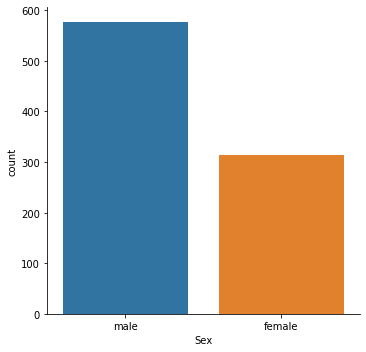

In [107]:
#check for sex ratio
sns.catplot("Sex",  data=titanic_df, kind="count")

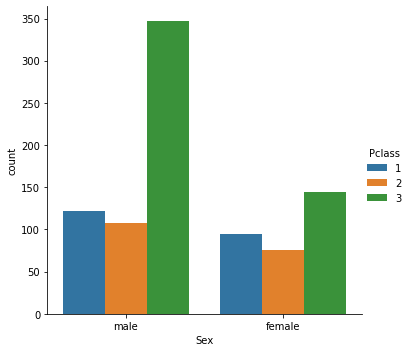

In [108]:
#check for gender based of their ticket class
sns.catplot("Sex",  data=titanic_df, kind="count", hue='Pclass')

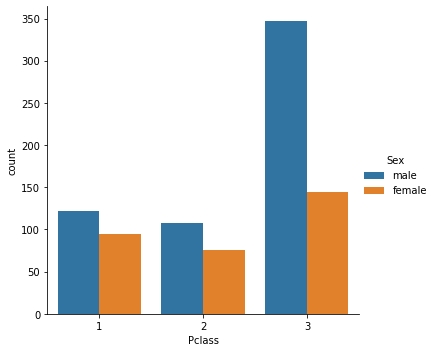

In [109]:
#check for ticket class based on gender
sns.catplot("Pclass",  data=titanic_df, kind="count", hue='Sex')

In [110]:
#To check number of childrens on board, consider children age between 0 to 15 inclusive
#create a function which distinguish passanger as child or male or female based out of age

def male_female_child(passanger):
    age,sex = passanger
    
    if age<16:
        return 'child'
    else:
        return sex

In [111]:
#create a new column called person, use above function using apply() method
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [112]:
#check for any child values
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


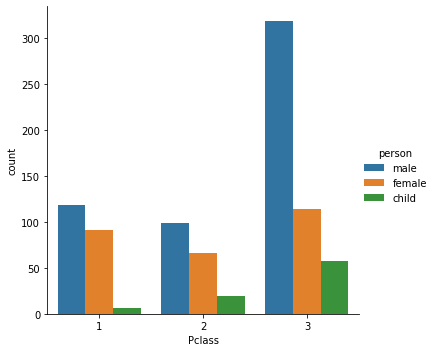

In [113]:
#plot a graph for ticket class based on persons on board
sns.catplot('Pclass', data=titanic_df, kind='count', hue='person')

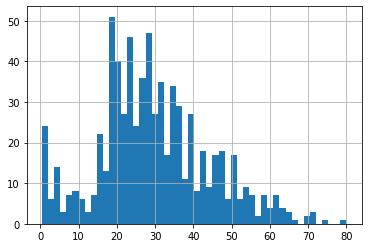

In [114]:
#plot age histogram of all the passangers
titanic_df['Age'].hist(bins=50)

In [115]:
#calculate mean of the age
titanic_df['Age'].mean()

29.69911764705882

In [116]:
#to calculate number of each person category i.e. male, female and childern on board
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

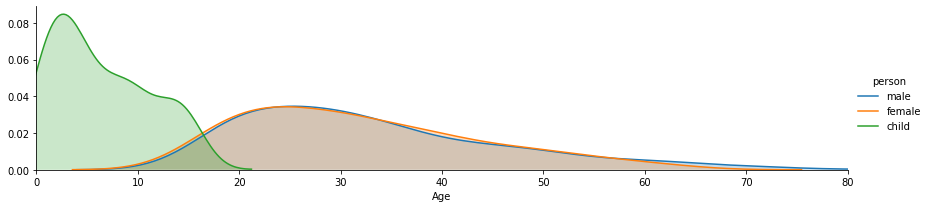

In [117]:
#determine the bandwidth of the person category with their age using KDE plot
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df.Age.max()
fig.set(xlim=(0,oldest))
fig.add_legend()

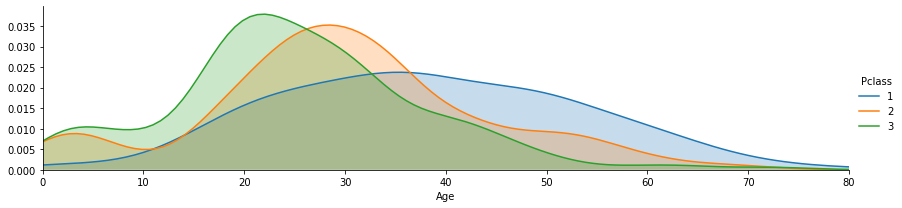

In [118]:
#determine the bandwidth of the Pclass category with their age using KDE plot
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df.Age.max()
fig.set(xlim=(0,oldest))
fig.add_legend()

## **What deck were on passangers on and how does that relate to their class?**##

In [119]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

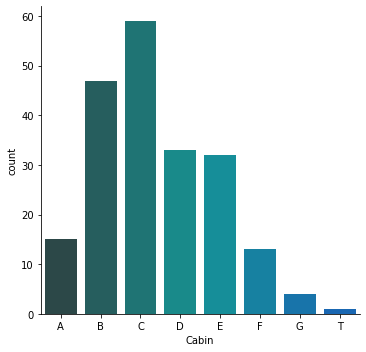

In [140]:
levels = []
for d in deck:
    levels.append(d[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df['Pclass'] = titanic_df['Pclass']
cabin_df.sort_values(by=['Cabin'],inplace=True)

sns.catplot('Cabin', data=cabin_df, kind='count', palette='winter_d')

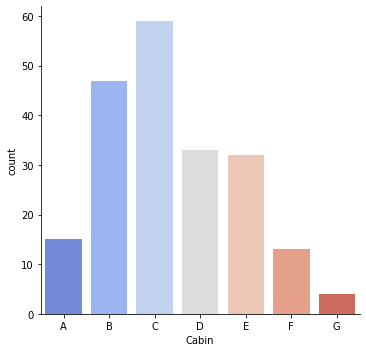

In [150]:
#drop 'T' value from Cabin column created above

cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot('Cabin', data=cabin_df, kind='count', palette='coolwarm')

## **Where did the passangers come from?**

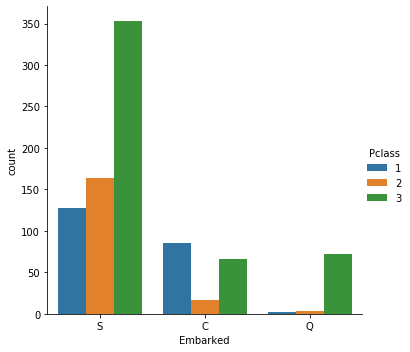

In [122]:
#drop all rows with NA values in Embarked column and create a new dataframe

titanic_df_no_embarked = titanic_df.dropna(axis=0, subset=['Embarked'])

sns.catplot('Embarked', data=titanic_df_no_embarked, hue='Pclass', kind='count')

## **Who was alone and who was with family?**

In [123]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [124]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'].loc[titanic_df.Alone > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df.Alone == 0] = 'Alone'

C:\Users\MLAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


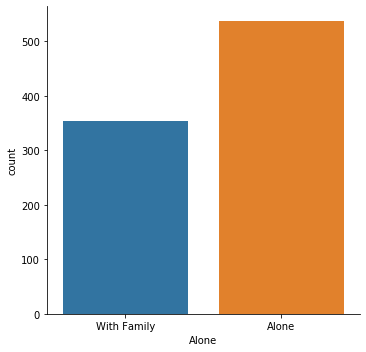

In [125]:
sns.catplot('Alone', data=titanic_df, kind='count')

## **What factors helped someone survive the sinking or crash of the Titanic?**

In [126]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'no',1:'yes'})

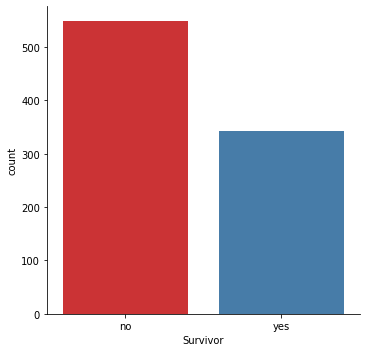

In [127]:
sns.catplot('Survivor', data=titanic_df, palette='Set1', kind='count')

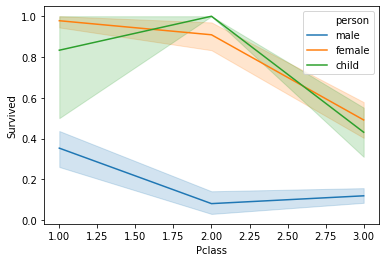

In [128]:
#determine if Pclass and person category combinations helped people survived or not!
sns.lineplot('Pclass','Survived' , data=titanic_df, hue='person')

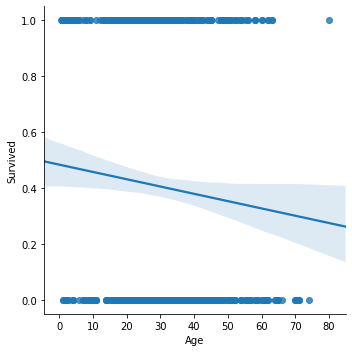

In [130]:
#determine if Age category helped people survived or not!
sns.lmplot('Age','Survived', data=titanic_df)

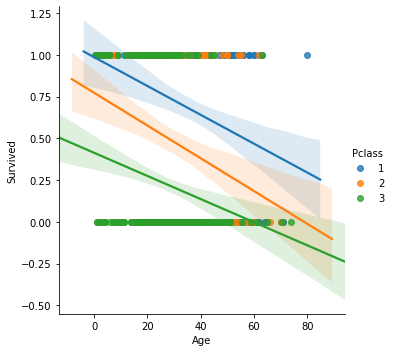

In [131]:
#determine if Age and Pclass category combinations helped people survived or not!
sns.lmplot('Age','Survived', data=titanic_df, hue='Pclass')

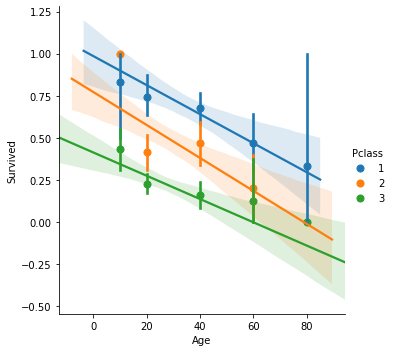

In [132]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived', data=titanic_df, hue='Pclass', x_bins=generations)

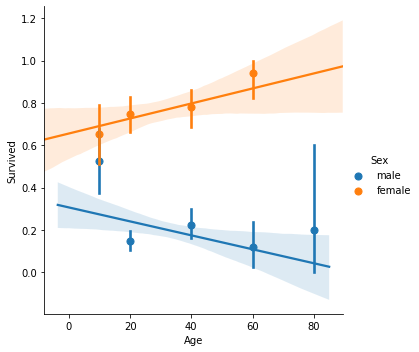

In [135]:
#determine if Age and Gender category combinations helped people survived or not!
sns.lmplot('Age','Survived', data=titanic_df, hue='Sex', x_bins=generations)

In [144]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN


In [187]:
#determine if deck have an effect on the passangers survival rate? Did the answer match up with your intuition?
deck_df = titanic_df[['Cabin','Survived','person']]
deck_df.dropna(axis=0, subset=['Cabin'], inplace=True)
deck_df['Deck'] = deck_df['Cabin'].astype(str).str[0]
deck_df = deck_df[deck_df.Deck != 'T']

C:\Users\MLAI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MLAI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [188]:
deck_df.head()

,Cabin,Survived,person,Deck
1,C85,1,female,C
3,C123,1,female,C
6,E46,0,male,E
10,G6,1,child,G
11,C103,1,female,C


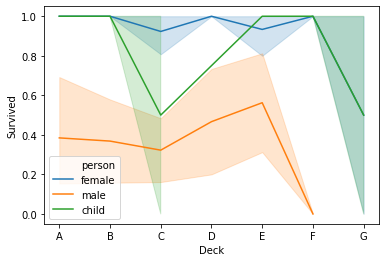

In [189]:
sns.lineplot('Deck','Survived',data=deck_df,hue='person')

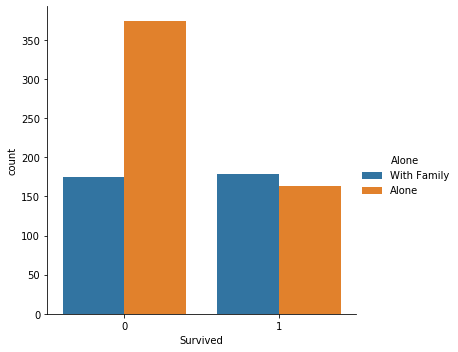

In [201]:
#determine if having a family member increase the odds of surviving the crash?
sns.catplot('Survived', data=titanic_df, hue='Alone', kind='count')

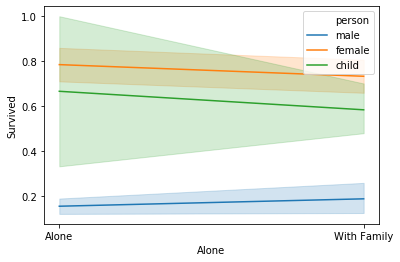

In [193]:
sns.lineplot('Alone','Survived', data=titanic_df, hue='person')